In [29]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from ipywidgets import *
sns.set_style('white')

In [2]:
#Get the data into Pandas Dataframe object
df=pd.read_csv('ratings.csv')

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


### Doing some data preprocessing

In [4]:
df.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
#Get the Movie Titles
movie_titles = pd.read_csv('movieIdTitles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [7]:
#Merge the dataset with movie titles
df = pd.merge(df, movie_titles, how='outer',on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,1.0,16,4.0,1.217898e+09,Casino (1995)
1,9.0,16,4.0,8.426867e+08,Casino (1995)
2,12.0,16,1.5,1.144396e+09,Casino (1995)
3,24.0,16,4.0,9.634688e+08,Casino (1995)
4,29.0,16,3.0,8.368202e+08,Casino (1995)


In [8]:
#Merge the dataset with movie titles
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

### Do some Exploratory Data Analysis

In [9]:


df.groupby('title')['rating'].mean().sort_values(ascending = False).head()



title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

In [10]:


df.groupby('title')['rating'].count().sort_values(ascending = False).head()



title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [11]:


ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()



,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [12]:


ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()



,rating,numOfRatings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


<Axes: >

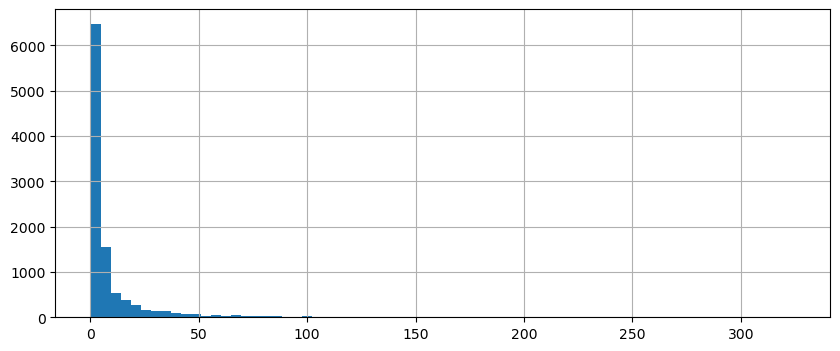

In [13]:


plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)



<Axes: >

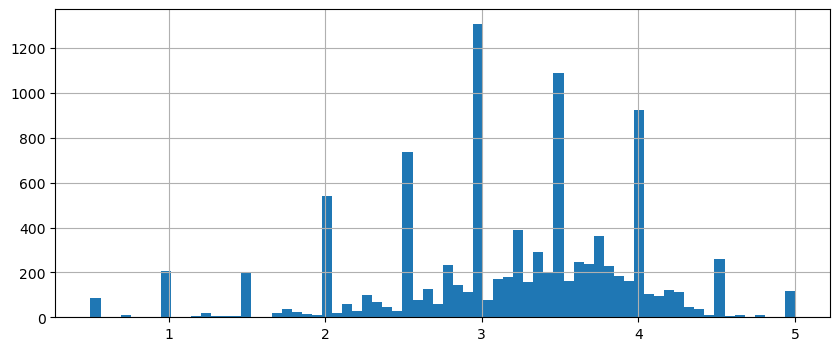

In [14]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

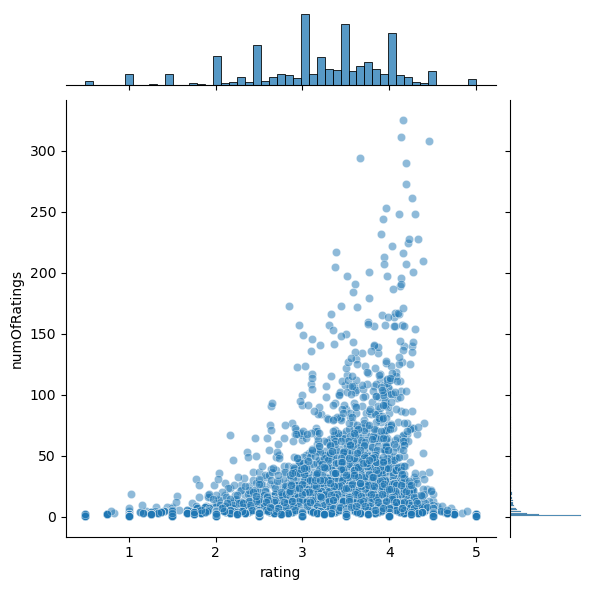

In [15]:


sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)



### Create the Recommendation System

In [16]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


### Creating correlation matrix

In [18]:
for i in ratings.index:
    movieUserRatings = moviemat[i]
    similarToThatMovie = moviemat.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns = ['Correlation'])
    corr_toMovie.dropna(inplace = True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending = False).head()
    if result['numOfRatings'].count() >= 5:
        print(i)
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]
    

'Til There Was You (1997)
'burbs, The (1989)
(500) Days of Summer (2009)
*batteries not included (1987)
...And Justice for All (1979)
10 (1979)
10 Items or Less (2006)
10 Things I Hate About You (1999)
10,000 BC (2008)
100 Girls (2000)
101 Dalmatians (1996)
101 Dalmatians (One Hundred and One Dalmatians) (1961)
102 Dalmatians (2000)
11:14 (2003)
12 Angry Men (1957)
12 Rounds (2009)
12 Years a Slave (2013)
127 Hours (2010)
13 Assassins (Jûsan-nin no shikaku) (2010)
13 Ghosts (1960)
13 Going on 30 (2004)
13th Warrior, The (1999)
1408 (2007)
1492: Conquest of Paradise (1992)
15 Minutes (2001)
16 Blocks (2006)
17 Again (2009)
1776 (1972)
187 (One Eight Seven) (1997)
1900 (Novecento) (1976)
1941 (1979)
1984 (1956)
1984 (Nineteen Eighty-Four) (1984)
2 Days in Paris (2007)
2 Days in the Valley (1996)
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)
2 Guns (2013)
20 Dates (1998)
20,000 Leagues Under the Sea (1954)
200 Cigarettes (1999)
2001 Maniacs (2005)
2001: A Space Odyssey (1968)
2010

KeyError: 'Bratz: The Movie (2007)'

In [19]:
#Check the result 
ratings.head()

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'71 (2014),3.500,1,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),3.000,1,NaN,NaN,NaN,NaN
'Round Midnight (1986),2.500,1,NaN,NaN,NaN,NaN
'Til There Was You (1997),4.000,3,Dances with Wolves (1990),Four Weddings and a Funeral (1994),"Wizard of Oz, The (1939)","Silence of the Lambs, The (1991)"
"'burbs, The (1989)",3.125,20,Total Recall (1990),"Shining, The (1980)",Clear and Present Danger (1994),Casablanca (1942)


In [20]:
ratings = ratings.fillna('-')

In [21]:
#Save the ratings data for later use
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

### Load the Saved Recommendation Data Generated for Reusability

In [22]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('MovieRecommendations.csv')
df_result.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'71 (2014),3.5,1,-,-,-,-
1,'Hellboy': The Seeds of Creation (2004),3.0,1,-,-,-,-
2,'Round Midnight (1986),2.5,1,-,-,-,-
3,'Til There Was You (1997),4.0,3,Dances with Wolves (1990),Four Weddings and a Funeral (1994),"Wizard of Oz, The (1939)","Silence of the Lambs, The (1991)"
4,"'burbs, The (1989)",3.125,20,Total Recall (1990),"Shining, The (1980)",Clear and Present Danger (1994),Casablanca (1942)


In [23]:
#Load all the movie names
for i in df_result['title']:
    print(i)

'71 (2014)
'Hellboy': The Seeds of Creation (2004)
'Round Midnight (1986)
'Til There Was You (1997)
'burbs, The (1989)
'night Mother (1986)
(500) Days of Summer (2009)
*batteries not included (1987)
...And Justice for All (1979)
10 (1979)
10 Items or Less (2006)
10 Things I Hate About You (1999)
10 to Midnight (1983)
10,000 BC (2008)
100 Girls (2000)
101 Dalmatians (1996)
101 Dalmatians (One Hundred and One Dalmatians) (1961)
101 Reykjavik (101 Reykjavík) (2000)
102 Dalmatians (2000)
10th & Wolf (2006)
10th Kingdom, The (2000)
11-11-11 (11-11-11: The Prophecy) (2011)
11:14 (2003)
11th Hour, The (2007)
12 (2007)
12 Angry Men (1957)
12 Angry Men (1997)
12 Rounds (2009)
12 Years a Slave (2013)
127 Hours (2010)
12:01 (1993)
13 (2010)
13 Assassins (Jûsan-nin no shikaku) (2010)
13 Ghosts (1960)
13 Going on 30 (2004)
13 Rue Madeleine (1947)
13th Warrior, The (1999)
1408 (2007)
1492: Conquest of Paradise (1992)
15 Minutes (2001)
16 Blocks (2006)
17 Again (2009)
1776 (1972)
187 (One Eight Seven

In [30]:
inputMovieName = widgets.Text()

def getRecommendations(sender):
    searchMovie = inputMovieName.value
    list_result = df_result[df_result['title'] == searchMovie]
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]
    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
    print(finalRecommendationText)
    

In [33]:
inputMovieName.on_submit(getRecommendations)
inputMovieName

Text(value='127 Hours (2010)')

Your Recommendations for the Movie 127 Hours (2010) are:

1:Crimson Tide (1995) 
2:Full Metal Jacket (1987) 
3:Monsters, Inc. (2001) 
4:Spider-Man (2002)
